## 在线性回归模型中使用梯度下降法

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [18]:
X = x.reshape(-1, 1)

In [19]:
X[:20]

array([[ 1.32947064],
       [ 0.67339736],
       [ 0.58634047],
       [ 1.96910531],
       [ 0.47524459],
       [ 0.58663258],
       [ 1.7185457 ],
       [ 1.43082137],
       [ 0.3340775 ],
       [ 1.18761235],
       [ 1.57634686],
       [ 0.85217601],
       [ 0.61261167],
       [ 1.52053916],
       [ 0.71142166],
       [ 0.85965113],
       [ 0.51617425],
       [ 0.17906303],
       [ 1.04732746],
       [ 1.53110184]])

In [20]:
y[:20]

array([  6.9902231 ,   5.17623613,   5.7417514 ,  10.24462143,
         6.22230277,   5.05870982,   8.59157001,   9.03380224,
         4.80403814,   7.27912057,   9.51205658,   4.73800545,
         4.50543838,   9.91981797,   5.64230563,   6.55037784,
         5.50483771,   5.22614373,   6.88959629,   9.12980779])

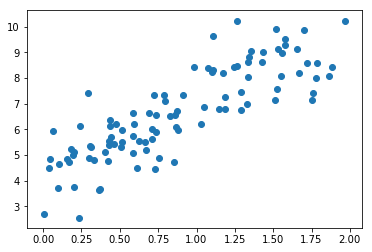

In [21]:
plt.scatter(x, y)
plt.show()

### 使用梯度下降法训练

![formula1](formula/formula1.png)

In [22]:
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta))**2)

In [23]:
def dJ(theta, X_b, y):
    res = [0] * len(theta)
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return np.array(res) * 2 / len(X_b)

In [24]:
def safe(f):
        
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
        
    return safe_f


def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    safe_J = safe(J)
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(safe_J(theta, X_b, y) - safe_J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [25]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])

In [26]:
initial_theta = np.zeros(X_b.shape[1])

In [27]:
initial_theta

array([ 0.,  0.])

In [28]:
eta = 0.01

In [29]:
theta = gradient_descent(X_b, y, initial_theta, eta)

In [30]:
theta

array([ 4.23401493,  2.75085739])